In [91]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from nltk import word_tokenize
from sklearn import metrics
from sklearn import svm
import pandas as pd
import nltk
import re

In [7]:
data = pd.read_csv('Tweets_Mg.csv', encoding='utf-8')

In [9]:
data.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.columns

Index(['Unnamed: 0', 'Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [11]:
data.Classificacao.value_counts()

Positivo    3300
Neutro      2453
Negativo    2446
Name: Classificacao, dtype: int64

<AxesSubplot:>

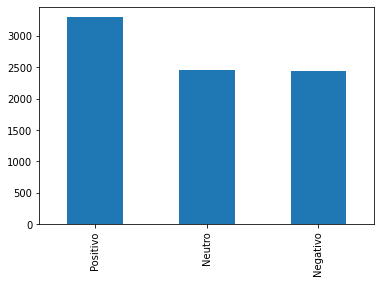

In [16]:
df.Classificacao.value_counts().plot(kind='bar')

In [17]:
df.count()

Unnamed: 0                   8199
Created At                   8199
Text                         8199
Geo Coordinates.latitude      104
Geo Coordinates.longitude     104
User Location                5489
Username                     8199
User Screen Name             8199
Retweet Count                8199
Classificacao                8199
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [18]:
data.drop_duplicates(['Text'], inplace=True)
data.Text.count()

5765

In [19]:
tweets = data['Text']
classes = data['Classificacao']

In [20]:
# de, a, para, com, ...
nltk.download('stopwords')

# Radical das palavras pedreiro --> pedra, pedreira --> pedra
nltk.download('rslp')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/lucas/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /home/lucas/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt to /home/lucas/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/lucas/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [39]:
def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [40]:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for word in instancia.split():
        palavras.append(stemmer.stem(word))
    return (" ".join(palavras))

In [36]:
def Limpeza_dados(instancia):
    instacia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instacia)

In [41]:
wordnet_lemmatizer = WordNetLemmatizer()

def Lemmatization(instancia):
    palavras = []
    for word in instancia.split():
        palavras.append(wordnet_lemmatizer.lemmatize(word))
    return (" ".join(palavras))

In [27]:
RemoveStopWords('Eu não gosto do partido, e também não votaria novamente nesse governante!')

'Eu gosto partido, votaria novamente nesse governante!'

In [33]:
Stemming('Eu não gosto do partido, e também não votaria novamente nesse governante!')

'eu não gost do partido, e também não vot nov ness governante!'

In [37]:
Limpeza_dados('Assita aqui o video do Governador falando sobre a CEMIG https://www.uol.com.br :) ;)')

'assita aqui o video do governador falando sobre a cemig   '

In [38]:
Lemmatization('Os carros são bonitos')

'Os carros são bonito'

In [42]:
def Preprocessing(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

tweets = [Preprocessing(i) for i in tweets]

In [43]:
Preprocessing('Eu não gosto do partido, e também não votaria novamente nesse governante. Assita o video aqui https:// :)')

'gost partido, vot nov ness govern assit vide aqu'

In [44]:
tweets[:50]

['���⛪ @ catedr sant antôni govern valadares/mg',
 '� @ govern valadares, min geral',
 '�� @ govern valadares, min geral',
 '���',
 '��� psol vai quest aument vere prefeit bh justiç poli est min',
 '" bom band morto" deput cab júli conden fic ineleg 10 ano poli est min',
 '"e 25% min diz torc tim nenhum,mesm dentr est atléticomg cruz pq?"',
 '"a gigantesc barb mal" destaqu cadern cult est min',
 '"bb govern min tr disput sobr depósit judiciais"',
 '"com vc bh fic pequena!" bel horizont (pron [bɛloɾiˈzõntʃi][10] capit est mg, áre aproximad 331 km²',
 '"daí gent visit govern valadares" "qu lug eh mãe?" "mg, gent um parent la" man ond q parent',
 '"é bonit bonita" #latergr #ibiturun #hom @ govern valadares, min geral',
 '"err desconhecido" mato! aliás, secret estad fazend tá assim mg precis dinh não, governador?',
 '"la la land cant estações" arras glob our est min',
 '"la la land cant estações" arras glob our est min',
 '"lo abusos, aun en el est má sólido, son min sord tard tempr estall

In [53]:
df = pd.read_csv('Tweets_Mg.csv', encoding='utf-8')
df.drop_duplicates(['Text'], inplace=True)
tweets = df['Text']
classes = df['Classificacao']

In [50]:
frase = 'A live do @blogminerando é show! :) :-) ;) =D ⛪ '

In [51]:
word_tokenize(frase)

['A',
 'live',
 'do',
 '@',
 'blogminerando',
 'é',
 'show',
 '!',
 ':',
 ')',
 ':',
 '-',
 ')',
 ';',
 ')',
 '=D',
 '⛪']

In [52]:
tweet_tokenizer = TweetTokenizer()
tweet_tokenizer.tokenize(frase)

['A',
 'live',
 'do',
 '@blogminerando',
 'é',
 'show',
 '!',
 ':)',
 ':-)',
 ';)',
 '=D',
 '⛪']

In [54]:
vectorizer = CountVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)

In [55]:
fre_tweets = vectorizer.fit_transform(tweets)
type(fre_tweets)

scipy.sparse.csr.csr_matrix

In [56]:
fre_tweets.shape

(5765, 13362)

In [57]:
modelo = MultinomialNB()
modelo.fit(fre_tweets, classes)

MultinomialNB()

In [58]:
fre_tweets.A

array([[0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [80]:
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT',
          'O governador de Minas é muito bom']

In [81]:
freq_testes = vectorizer.transform(testes)

In [82]:
for t, c in zip (testes,modelo.predict(freq_testes)):
    print(t +", "+ c)

Esse governo está no início, vamos ver o que vai dar, Neutro
Estou muito feliz com o governo de Minas esse ano, Neutro
O estado de Minas Gerais decretou calamidade financeira!!!, Negativo
A segurança desse país está deixando a desejar, Neutro
O governador de Minas é mais uma vez do PT, Neutro
O governador de Minas é muito bom, Neutro


In [85]:
print(modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.21, 0.79, 0.  ],
       [0.04, 0.96, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.01, 0.98, 0.  ],
       [0.14, 0.86, 0.  ],
       [0.  , 0.94, 0.05]])

In [88]:
def marque_negacao(texto):
    negacoes = ['não', 'not']
    negacoes_detectada = False
    resultado = []
    palavras = texto.split()
    for word in palavras:
        word = word.lower()
        if negacoes_detectada == True:
            word = word + '_NEG'
        if word in negacoes:
            negacoes_detectada = True
        resultado.append(word)
    return (" ".join(resultado))

In [89]:
marque_negacao('Eu gosto do partido, votaria novamente nesse governante!')

'eu gosto do partido, votaria novamente nesse governante!'

In [90]:
marque_negacao('Eu Não gosto do partido e também não votaria novamente nesse governante!')

'eu não gosto_NEG do_NEG partido_NEG e_NEG também_NEG não_NEG votaria_NEG novamente_NEG nesse_NEG governante!_NEG'

In [107]:
pipeline_simples = Pipeline(
    [
        ('counts', CountVectorizer()),
        ('classifier', MultinomialNB())
    ]
)

In [108]:
pipeline_negacoes = Pipeline(
    [
        ('counts', CountVectorizer(tokenizer=lambda texto: marque_negacao(texto))),
        ('classifier', MultinomialNB())
    ]
)

In [109]:
pipeline_simples.fit(tweets, classes)

Pipeline(steps=[('counts', CountVectorizer()), ('classifier', MultinomialNB())])

In [110]:
pipeline_simples.steps

[('counts', CountVectorizer()), ('classifier', MultinomialNB())]

In [111]:
pipeline_negacoes.fit(tweets, classes)

Pipeline(steps=[('counts',
                 CountVectorizer(tokenizer=<function <lambda> at 0x7f8cae74c430>)),
                ('classifier', MultinomialNB())])

In [112]:
pipeline_negacoes.steps

[('counts', CountVectorizer(tokenizer=<function <lambda> at 0x7f8cae74c430>)),
 ('classifier', MultinomialNB())]

In [113]:
pipeline_simples_svm = Pipeline(
    [
        ('counts', CountVectorizer()),
        ('classifier', svm.SVC(kernel='linear'))
    ]
)

In [114]:
pipeline_negacoes_svm = Pipeline(
    [
        ('counts', CountVectorizer(tokenizer=lambda texto: marque_negacao(texto))),
        ('classifier', svm.SVC(kernel='linear'))
    ]
)

In [120]:
resultados = cross_val_predict(pipeline_simples, tweets, classes, cv=10)

In [121]:
metrics.accuracy_score(classes, resultados)

0.8716392020815265

In [122]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.95      0.89      0.92      2840
    Negativo       0.80      0.87      0.83       951
      Neutro       0.81      0.84      0.83      1974

    accuracy                           0.87      5765
   macro avg       0.85      0.87      0.86      5765
weighted avg       0.88      0.87      0.87      5765



/home/lucas/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=['Positivo', 'Negativo', 'Neutro'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [123]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       832     111         8   951
Neutro         175    1662       137  1974
Positivo        37     272      2531  2840
All           1044    2045      2676  5765


In [124]:
def Metricas(modelo, tweets, classes):
  resultados = cross_val_predict(modelo, tweets, classes, cv=10)
  return 'Acurácia do modelo: {}'.format(metrics.accuracy_score(classes,resultados))

In [125]:
Metricas(pipeline_simples,tweets,classes)

'Acurácia do modelo: 0.8716392020815265'

In [126]:
Metricas(pipeline_negacoes,tweets,classes)

'Acurácia do modelo: 0.6830875975715525'

In [130]:
Metricas(pipeline_simples_svm,tweets,classes)

'Acurácia do modelo: 0.8947094535993062'

In [131]:
Metricas(pipeline_negacoes_svm,tweets,classes)

'Acurácia do modelo: 0.769297484822203'